In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;

In [2]:
df = pd.read_csv("score.csv")
df.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

## Step 1: Understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["Scores"].sort_values(ascending = False)[:5]

15    95
6     88
24    86
10    85
8     81
Name: Scores, dtype: int64

C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

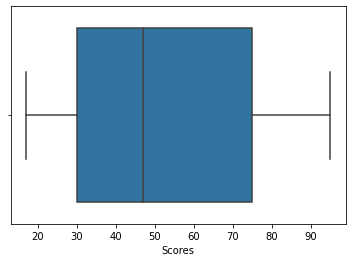

In [8]:
sns.boxplot(df['Scores'])

C:\Users\moh_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

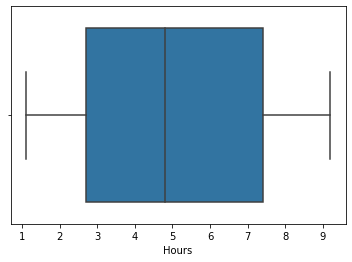

In [9]:
sns.boxplot(df['Hours'])

## Observation:
    1- All the variables are Quantative and same data types are integers and float
    2- The data doesn't include any missing values (null) and no dublicated values as well.
    3- the mean, std, max and min values are also explanatory for the description of our variables.
    4- There're no outliers in our dataset.

## Step 2: 
#### Supervised machhine learning using a simple linear regression:


In [10]:
df['intercept'] = 1

lm = sm.OLS(df['Scores'], df[['intercept', 'Hours']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           9.13e-17
Time:                        17:34:59   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observations: 
    1- The correlation coeffecient R is strong positive and the R square is 0.953.
    2- b0 2.4837.
    3- b1 9.7758.
    4- The number of study hours is statistically significant in relation to the MArks of the students and the slope is equal to zero and the null hypothysis.


Text(0.5, 1.0, 'plot of number of Study hours vs Marks of the student')

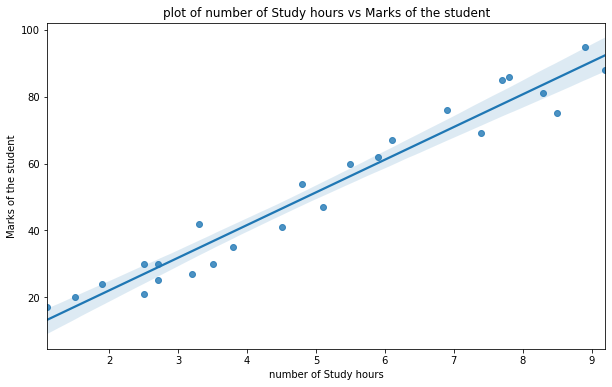

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x='Hours',y='Scores', data=df)
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")

### Observations:
    1- The model is perfectly fitting the data and the correlation coeffecient R is strong positive, Which means that the more time a student spent studying, the higher their score will be.